# Lab08 - Bài tập

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

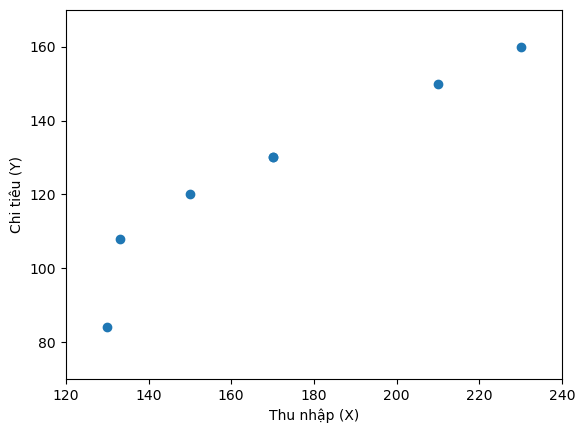

In [65]:
x = np.array([130, 150, 133, 170, 170, 210, 230])
y = np.array([ 84, 120, 108, 130, 130, 150, 160])

plt.plot(x, y, 'o')
plt.axis([120, 240, 70, 170])
plt.xlabel('Thu nhập (X)')
plt.ylabel('Chi tiêu (Y)')
plt.show()

In [66]:
np.corrcoef(x, y)

array([[1.        , 0.94705241],
       [0.94705241, 1.        ]])

In [67]:
tu = sum((x - x.mean()) * (y - y.mean()))
tu

5466.0

In [68]:
mau = sum((x - x.mean()) * (x - x.mean()))
mau

8567.714285714286

In [69]:
b1 = tu/mau
b1

0.6379764564644679

In [70]:
b0 = y.mean() - b1 * x.mean()
b0

17.270583919698552

In [146]:
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")

Mô hình hồi quy: y = 9.0808 + -0.1774x


In [72]:
x0 = x.min()
y0 = b0 + b1*x0

x1 = x.max()
y1 = b0 + b1*x1

print(x0, y0)
print(x1, y1)

130 100.20752326007937
230 164.00516890652614


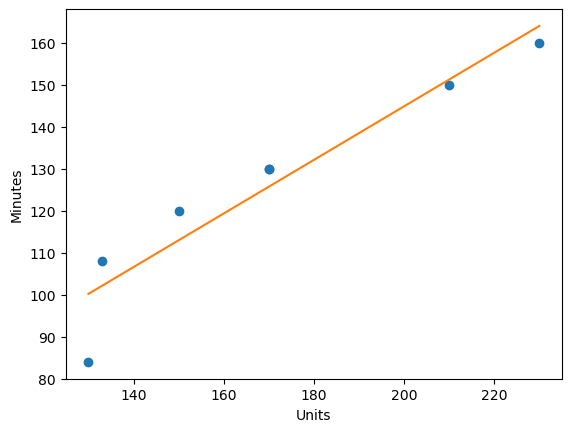

In [73]:
plt.plot(x, y, 'o')
plt.plot([x0, x1], [y0, y1])

plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

In [91]:
print("Mức chi tiêu nhân viên công ty biết thu nhập là 200$:",17.2706 + 0.638*200)

Mức chi tiêu nhân viên công ty biết thu nhập là 200$: 144.87060000000002


Cách 2

In [75]:
model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     43.50
Date:                Tue, 09 Apr 2024   Prob (F-statistic):            0.00120
Time:                        13:32:35   Log-Likelihood:                -24.099
No. Observations:                   7   AIC:                             52.20
Df Residuals:                       5   BIC:                             52.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2706     16.829      1.026      0.3

e:\annacoda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [76]:
model.params

Intercept    17.270584
x             0.637976
dtype: float64

In [77]:
print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")

Mô hình hồi quy: y = 17.2706 + 0.638x


In [90]:
print("Mức chi tiêu nhân viên công ty biết thu nhập là 200$:",17.2706 + 0.638*200)

Mức chi tiêu nhân viên công ty biết thu nhập là 200$: 144.87060000000002


### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng)

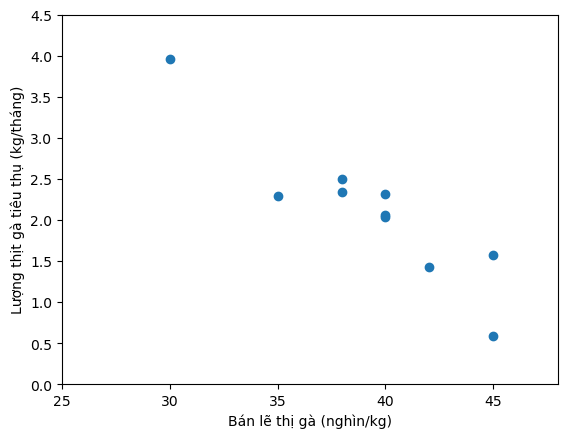

In [108]:
x = np.array([35, 40, 45, 40, 38, 40, 45, 30, 42, 38])
y = np.array([ 2.29, 2.04, 0.59, 2.06, 2.50, 2.32, 1.57, 3.96, 1.43, 2.34])

plt.plot(x, y, 'o')
plt.axis([25, 48, 0, 4.5])
plt.xlabel('Bán lẽ thị gà (nghìn/kg)')
plt.ylabel('Lượng thịt gà tiêu thụ (kg/tháng)')
plt.show()

In [79]:
np.corrcoef(x, y)

array([[ 1.        , -0.91953287],
       [-0.91953287,  1.        ]])

In [80]:
tu = sum((x - x.mean()) * (y - y.mean()))
tu

-32.300000000000004

In [81]:
mau = sum((x - x.mean()) * (x - x.mean()))
mau

182.10000000000002

In [82]:
b1 = tu/mau
b1

-0.17737506864360242

In [83]:
b0 = y.mean() - b1 * x.mean()
b0

9.080840197693576

In [84]:
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")

Mô hình hồi quy: y = 9.0808 + -0.1774x


In [85]:
x0 = x.min()
y0 = b0 + b1*x0

x1 = x.max()
y1 = b0 + b1*x1

print(x0, y0)
print(x1, y1)

30 3.759588138385503
45 1.0989621087314667


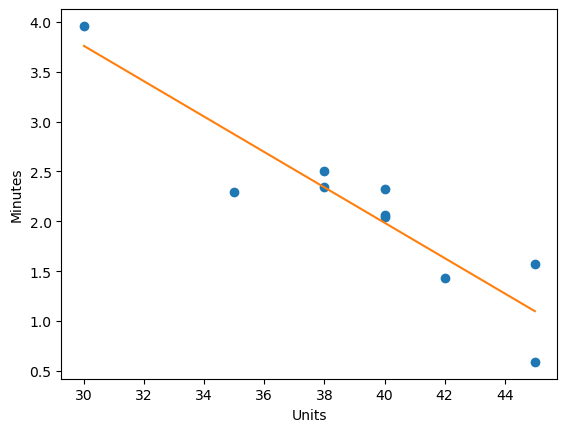

In [86]:
plt.plot(x, y, 'o')
plt.plot([x0, x1], [y0, y1])

plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

In [87]:
print("Lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng):",9.0808 + -0.1774*41)

Lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng): 1.8073999999999995


Cách 2

In [92]:
model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.79
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           0.000166
Time:                        13:34:26   Log-Likelihood:                -2.9041
No. Observations:                  10   AIC:                             9.808
Df Residuals:                       8   BIC:                             10.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0808      1.060      8.570      0.0

e:\annacoda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [93]:
model.params

Intercept    9.080840
x           -0.177375
dtype: float64

In [95]:
print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")

Mô hình hồi quy: y = 9.0808 + -0.1774x


In [96]:
print("Lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng):",9.0808 + -0.1774*41)

Lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng): 1.8073999999999995


## Bài 3

Dụa trên file dữ liệu `Advertising.csv` bạn hãy dự đoán doanh số bán hàng (`sales`) dựa trên số tiền chi cho các nền tảng tiếp thị khác nhau như `TV`, `Radio` và `Newspaper`

a. Đọc file dữ liệu cho biết các thông tin cơ bản về dữ liệu: kích thước, dữ liệu có giá trị trống hay không, hiện các giá trị thống kê cơ bản của các thuộc tính.

b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression) trước tiên cần lựa chọn một trong các thuộc tính còn lại. Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách

c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?

In [121]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64


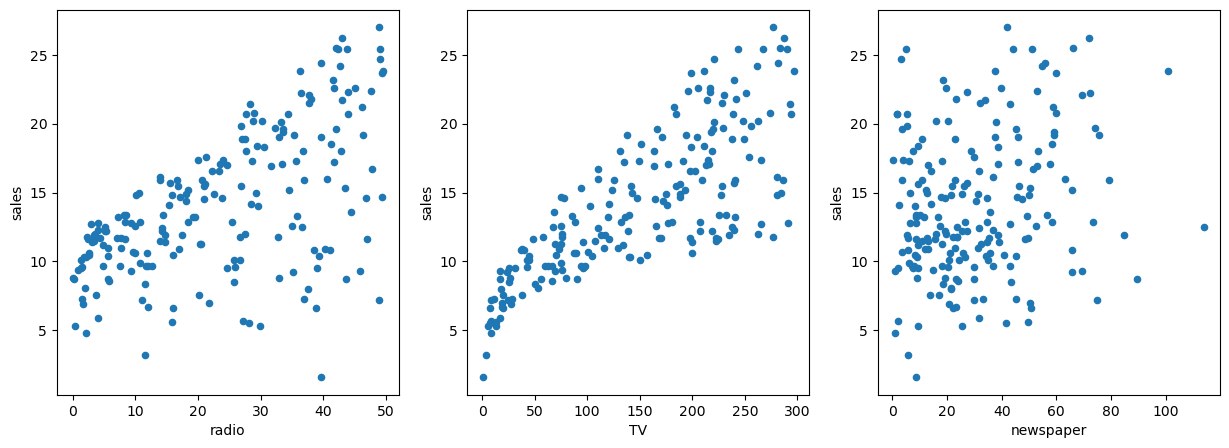

In [150]:
df = pd.read_csv('Advertising.csv')
corr_matrix = df.corr()
print(corr_matrix['sales'].sort_values(ascending=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df.plot.scatter(x='radio', y='sales', ax=axes[0])
df.plot.scatter(x='TV', y='sales', ax=axes[1])
df.plot.scatter(x='newspaper', y='sales', ax=axes[2])
plt.show()

In [122]:
data = pd.read_csv('Advertising.csv')

print("Shape of the data:", data.shape)

print("Missing values:", data.isnull().sum())

print("Basic statistics of the data:")
print(data.describe())

Shape of the data: (200, 5)
Missing values: Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64
Basic statistics of the data:
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [120]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


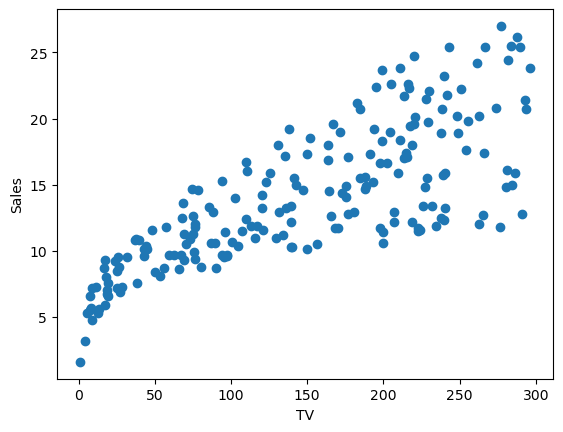

Hệ số tương quan giữa doanh số & TV: 0.7822244248616064


In [125]:
plt.scatter(df['TV'], df['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()
# Cách 2
corr_tv = np.corrcoef(df['TV'], df['sales'])[0, 1]
print(f'Hệ số tương quan giữa doanh số & TV: {corr_tv}')

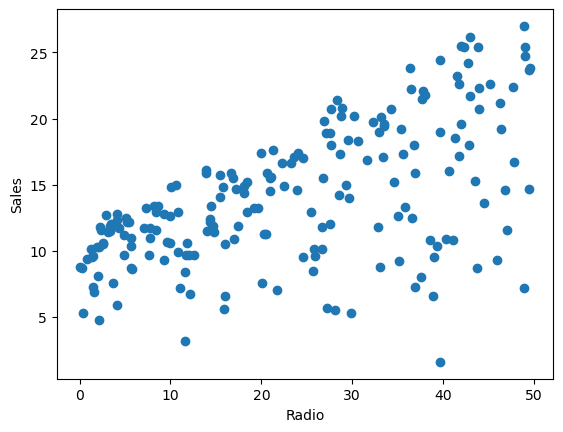

Hệ số tương quan giữa doanh số & Radio: 0.5762225745710553


In [126]:
plt.scatter(df['radio'], df['sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()
# Cách 2
corr_radio = np.corrcoef(df['radio'], df['sales'])[0, 1]
print(f'Hệ số tương quan giữa doanh số & Radio: {corr_radio}')

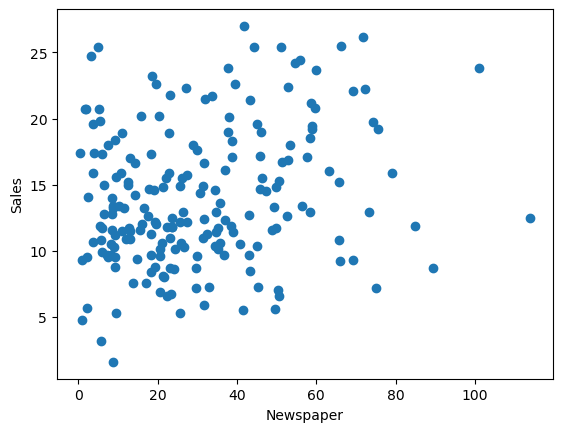

Hệ số tương quan giữa doanh số và Newspaper: 0.22829902637616534


In [132]:
plt.scatter(df['newspaper'], df['sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()
# Cách 2
corr_newspaper = np.corrcoef(df['newspaper'], df['sales'])[0, 1]
print(f'Hệ số tương quan giữa doanh số và Newspaper: {corr_newspaper}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        13:56:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

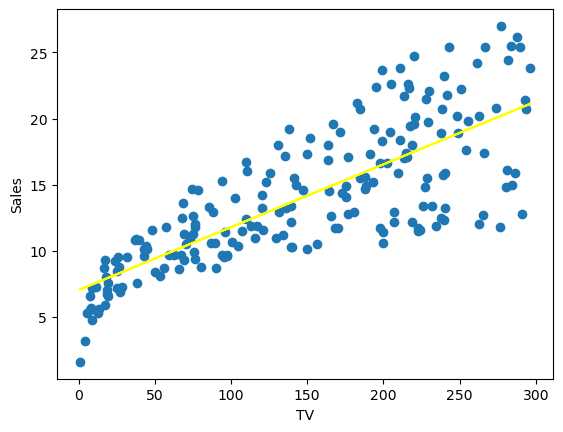

In [139]:
X = df['TV'].values.reshape(-1, 1)
y = df['sales'].values

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(df['TV'], df['sales'])
plt.plot(df['TV'], model.predict(X), color='yellow')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

---